In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [242]:
df.shape

(512, 31)

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
round(df.isna().sum()/df.shape[0],2)*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [7]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Before working with the outliers, I want to convert the diagnosis column into numeric.
# 0 for benign, and 1 for malignant.

df['diagnosis']=[0.0 if i=='B' else 1.0 for i in df.diagnosis]

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Outliers

I want to check outliers. I will use two different methods, and see which one helps me lose the least data : as I have a small dataset, I want to lose the least possible amount of data, while keeping it representative.

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

In [12]:
# Not easy to read but :
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
5        False        False         False           False      False   
6        False        False         False           False      False   
7        False        False         False           False      False   
8        False        False         False           False      False   
9        False        False         False           False      False   
10       False        False         False           False      False   
11       False        False         False           False      False   
12       False        False         False           False      F

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [13]:
# New dataset without values outside of IQR for each column :
testingIQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
testingIQR.shape

(398, 31)

In [14]:
# Not great. I lose over 100 rows.
# I want to check if my target column still contains
#a representative ratio of benign and malignant :
testingIQR.diagnosis.value_counts(normalize=True)

0.0    0.753769
1.0    0.246231
Name: diagnosis, dtype: float64

In [15]:
# 75/25 % 
# This is not ideal as it will biase classification.

## Using Z score

In [16]:
# Using a Z score supposes testing data that is normally distributed.

In [17]:
#I want to check if the p-value for the shapiro test of each column is <0.05.
for col in df.columns.tolist():
    if shapiro(df[col])[1] <0.05 :
        print(f'Can\'t reject that {col} isn\'t normally distributed')
    else :
        print(f'Can reject that {col} isn\'t normally distributed')

Can't reject that diagnosis isn't normally distributed
Can't reject that radius_mean isn't normally distributed
Can't reject that texture_mean isn't normally distributed
Can't reject that perimeter_mean isn't normally distributed
Can't reject that area_mean isn't normally distributed
Can't reject that smoothness_mean isn't normally distributed
Can't reject that compactness_mean isn't normally distributed
Can't reject that concavity_mean isn't normally distributed
Can't reject that concave points_mean isn't normally distributed
Can't reject that symmetry_mean isn't normally distributed
Can't reject that fractal_dimension_mean isn't normally distributed
Can't reject that radius_se isn't normally distributed
Can't reject that texture_se isn't normally distributed
Can't reject that perimeter_se isn't normally distributed
Can't reject that area_se isn't normally distributed
Can't reject that smoothness_se isn't normally distributed
Can't reject that compactness_se isn't normally distributed

In [18]:
# Woops.Going to test using z-scores anyway...

In [19]:
z = np.abs(stats.zscore(df))

In [20]:
# I will use a threshold of 3, as it's standard usage.
testing = df[(z < 3).all(axis=1)]

In [21]:
testing.shape
# Not as bad as IQR outliers !

(495, 31)

In [22]:
testing.diagnosis.value_counts(normalize=True)
# This data is more representative. Not perfect, though.

0.0    0.670707
1.0    0.329293
Name: diagnosis, dtype: float64

In [23]:
# This may not be a very good pratise but I will use a larger threshold 
#to improve representativeness.
testing = df[(z < 3.3).all(axis=1)]
testing.diagnosis.value_counts(normalize=True)
# I am satisfied with the representativeness of my data, so I will use this cutoff technique.

0.0    0.658203
1.0    0.341797
Name: diagnosis, dtype: float64

In [24]:
df = df[(z < 3.3).all(axis=1)]

In [25]:
# The data has no nans, it is clean of outliers, and the data types are correct.

# Visualizations

In [26]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0.5, 1.0, 'Correlation matrix')

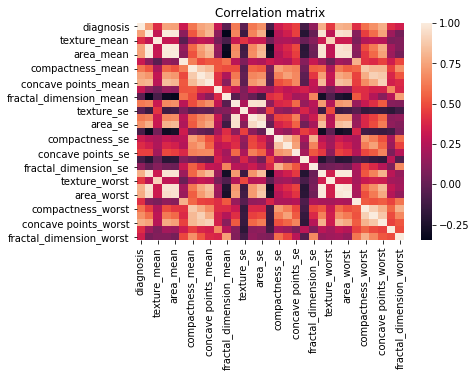

In [27]:
sns.heatmap(df.corr())
plt.title('Correlation matrix')

Text(0.5, 1.0, 'Distribution of the size of the tumours')

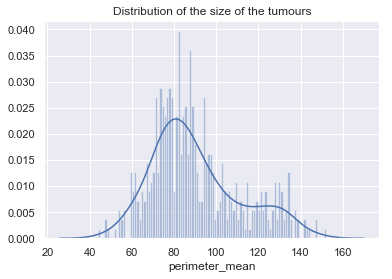

In [28]:
sns.set()
sns.distplot(df.perimeter_mean.sort_values(), bins=100)
plt.title('Distribution of the size of the tumours')

In [29]:
dfviolin = df.copy()
dfviolin['justforfun']=""
dfviolin['diagnosis']=['B' if i==0.0 else 'M' for i in dfviolin.diagnosis]

In [30]:
dfviolin.columns
feats = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean']

Text(0.5, 1.0, 'Radius mean, benign or malignant tumours')

C:\Users\Arty\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


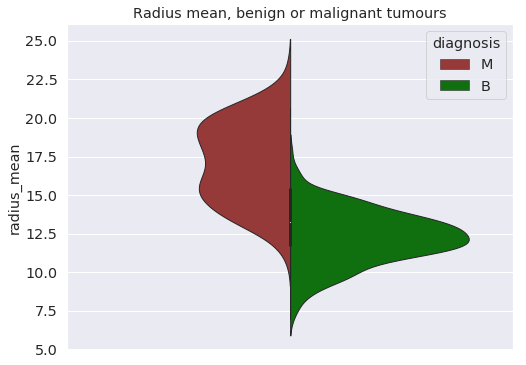

In [31]:
sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
my_pal = {"M": "brown", "B": "green"}

plt.figure(figsize=(8,6))

g = sns.violinplot(y='radius_mean', x='justforfun', hue='diagnosis', data=dfviolin,split=True,linewidth=1,palette=my_pal)
g.set_xlabel("")
plt.title("Radius mean, benign or malignant tumours")

# Modelling

In [34]:
X = df.loc[:, df.columns != 'diagnosis']
y = df.diagnosis

In [35]:
from sklearn.model_selection import train_test_split

X_tr,X_t,y_tr,y_t = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

cancer_model=LogisticRegression().fit(X_tr,y_tr)

C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [203]:
from sklearn.metrics import confusion_matrix

y_pred_test = cancer_model.predict(X_t)
basic_logistic_confuma = confusion_matrix(y_t,y_pred_test)
basic_logistic_confuma

array([[53,  4],
       [ 3, 43]], dtype=int64)

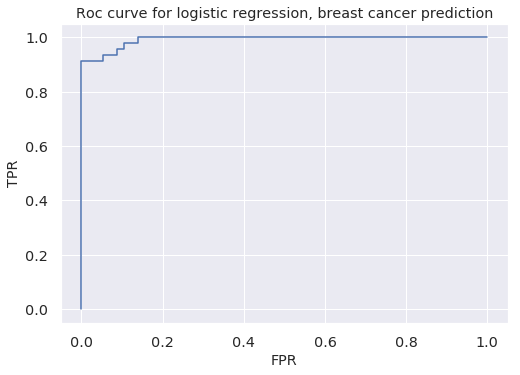

In [241]:
from sklearn import metrics
y_pred_proba = cancer_model.predict_proba(X_t)[::,1]  #different thresholds as an array
fpr,tpr,_=metrics.roc_curve(y_t,y_pred_proba)  #returns 3 arrays, not using the last one so "_"
plt.title('Roc curve for logistic regression, breast cancer prediction')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.plot(fpr,tpr)

In [38]:
auc=metrics.roc_auc_score(y_t,y_pred_proba)
auc    

0.9916094584286804

In [ ]:
# The model is already very good. However I would like to minimize FN and FP.
# I'll try to apply some feature engineering.

# Feature engineering

Improving the model by reducing features : for this I will start by using RFE.

In [50]:
X2 = df.loc[:, df.columns != 'diagnosis']
y2 = df.diagnosis

X_tr2,X_t2,y_tr2,y_t2 = train_test_split(X2,y2,test_size=0.2)
cancer_model2=LogisticRegression().fit(X_tr2,y_tr2)

C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
from sklearn.feature_selection import RFE

selector = RFE(cancer_model2, 10)
selector = selector.fit(X2, y2)
colskeep = selector.support_  ## returns true or false, with true = ranking 1
X2= X2[X2.columns[colskeep]]



C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Index(['radius_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

## Some plotting using the 10 most interesting features

In [141]:
# Reuniting diagnosis and 10 most interesting features
df_plot = X2
df_plot['diagnosis']=y2

C:\Users\Arty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
df_plot.shape

(512, 11)

Text(0.5, 1.0, 'Correlation heatmap for breast cancer tumours')

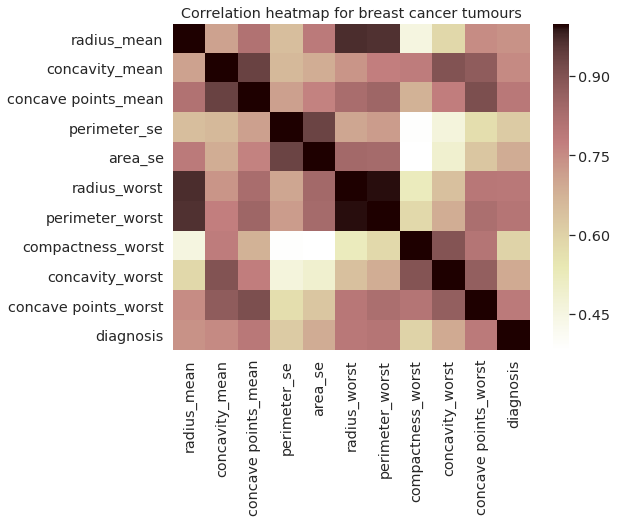

In [170]:
sns.heatmap(df_plot.corr(), cmap = 'pink_r')
plt.title('Correlation heatmap for breast cancer tumours')

In [175]:
df_plot.columns

Index(['radius_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'diagnosis'],
      dtype='object')

In [215]:
df_plot_st=df_plot.copy()
df_plot_st['diagnosis']=['B' if i==0.0 else 'M' for i in df_plot_st.diagnosis]

Text(0.5, 1.03, 'Pair plot for some features, breast cancer detection')

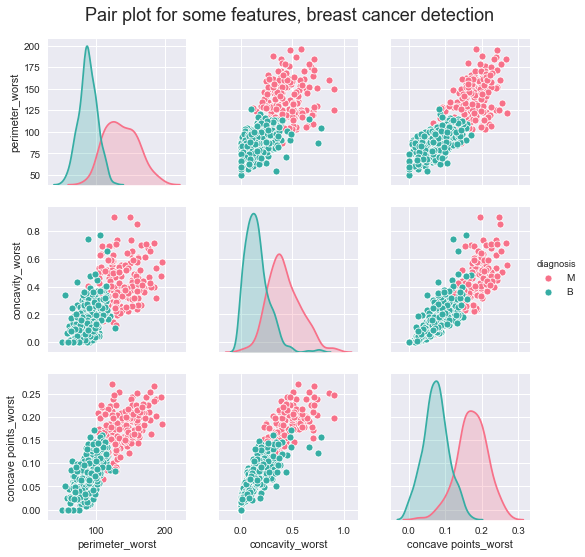

In [216]:
#sns.pairplot(df_plot.iloc[:,:4], hue="diagnosis")
g = sns.pairplot(df_plot_st, vars=["perimeter_worst", "concavity_worst", 'concave points_worst'], hue='diagnosis',palette="husl")
g.fig.suptitle("Pair plot for some features, breast cancer detection",y=1.03,  fontsize=18)


In [221]:
def standardize(x):
    x=(x-x.mean())/x.std()
    return x

In [222]:
#Standardizing the df to be able to plot multiple violin plots
df_plot_st.loc[:, df_plot_st.columns != 'diagnosis']=df_plot_st.loc[:, df_plot_st.columns != 'diagnosis'].apply(standardize)

In [224]:
df_plot_st.columns

Index(['radius_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'diagnosis'],
      dtype='object')

In [226]:
df_plot_st['split']=""

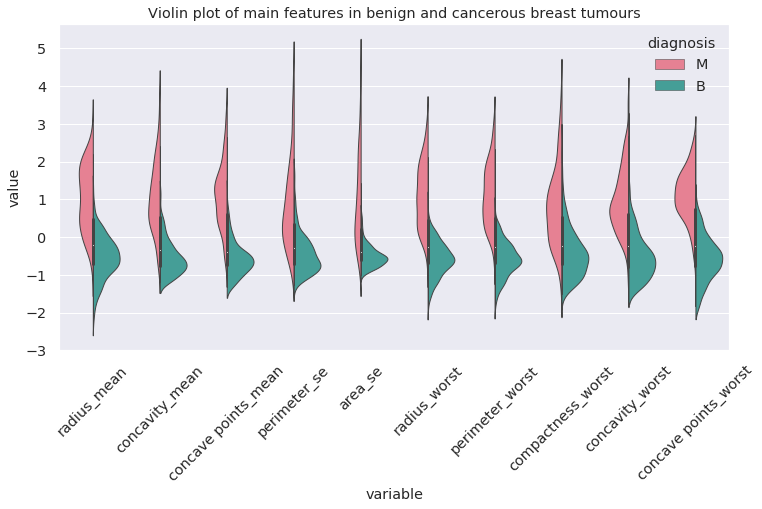

In [238]:

sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

plt.figure(figsize=(12,6))

df_violin_st = pd.melt(df_plot_st, value_vars=['radius_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'], id_vars='diagnosis')
sns.violinplot(x='variable', y='value', hue='diagnosis', data=df_violin_st, split=True,linewidth=1,palette='husl')
plt.xticks(rotation=45)
plt.title('Violin plot of main features in benign and cancerous breast tumours')
plt.show()

## Checking models with 10 features

In [143]:
X_tr2,X_t2,y_tr2,y_t2 = train_test_split(X2,y2,test_size=0.2)
cancer_model3=LogisticRegression().fit(X_tr2,y_tr2)

y_pred_test2 = cancer_model3.predict(X_t2)
confusion_matrix(y_t2,y_pred_test2)

#We've gained a few TP and TN ! Great news ! There are no more FN and TP !

C:\Users\Arty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[70,  0],
       [ 0, 33]], dtype=int64)

In [144]:
y_pred_proba2 = cancer_model3.predict_proba(X_t2)[::,1]  #different thresholds as an array
fpr,tpr,_=metrics.roc_curve(y_t2,y_pred_proba2)
auc=metrics.roc_auc_score(y_t2,y_pred_proba2)
auc  #Perfect 1 !

1.0

# Testing some different models

## Gaussian naive bayes

In [145]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred3=gnb.fit(X_tr2,y_tr2).predict(X_t2)
confusion_matrix(y_t2, y_pred3)


array([[70,  0],
       [ 0, 33]], dtype=int64)

## KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_model = KNeighborsClassifier(n_neighbors=2)
neighbor_model.fit(X_tr2,y_tr2)

y_pred4 = neighbor_model.predict(X_t2)
confusion_matrix(y_t2, y_pred4)

#We have no false positives, but more false negatives, which is very bad.

array([[70,  0],
       [11, 22]], dtype=int64)

## SVM

In [147]:
from sklearn import svm
svm_model = svm.SVC(gamma='scale')
svm_model.fit(X_tr2,y_tr2) 
y_pred5 = svm_model.predict(X_t2)
confusion_matrix(y_t2, y_pred5)

# Again, no false positives, but some false negatives.

array([[70,  0],
       [ 7, 26]], dtype=int64)

# Scaling down to 2 components using PCA

In [60]:
# To use PCA correctly, we must standardize our data.
from sklearn.preprocessing import StandardScaler
Xpca = X.values #values to get numpy array

ypca = y.values

Xpca = StandardScaler().fit_transform(Xpca)

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(Xpca)

Text(0.5, 1.0, 'PCA plotting for breast cancer cells')

C:\Users\Arty\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Arty\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


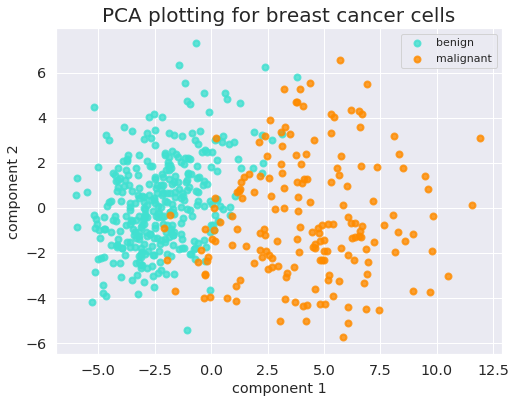

In [105]:
ydict = {'benign': 0.0 , 'malignant': 1.0}

sns.set()
params = { 'font.family': 'sans-serif',
          'font.sans-serif': 'Helvetica',
    #'legend.fontsize': 1,
          'figure.figsize':(8,6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

colors = ['turquoise', 'darkorange']
lw = 2

for color, i, yname in zip(colors, [0, 1], ydict.keys()):
    plt.scatter(Xreduced[ypca == i, 0], Xreduced[ypca == i, 1], color=color, alpha=.8, lw=lw,
                label=yname)


plt.xlabel('component 1')
plt.ylabel('component 2')


plt.legend( loc='best')
plt.title('PCA plotting for breast cancer cells', fontsize = 20)

